In [1]:
import sys
import os

project_path = os.path.abspath(os.path.join('../'))
if project_path not in sys.path:
    sys.path.append(project_path)

from utils.load_data import load_fer2013, parse_fer2013, \
                            load_CKPlus, fer_csv_to_png
from utils.preprocess import resnet_preprocess
from utils.generators import init_resnet_generator, init_cnn_generator
from utils.plots import plot_model_history
from models.build import build_resnet_model, build_cnn_baseline_model

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

import numpy as np

Using TensorFlow backend.


In [2]:
num_train = 28709
num_val = 3589
batch_size = 128
num_epochs = 150
patience = 20
saved_models_path = '../models/saved_models/'
dataset_name = 'fer2013'
model_name = '_resnet50_1'
history_name = '_hist' + model_name

# ../models/saved_models/fer2013_resnet50_1
model_path = saved_models_path + dataset_name + model_name

# ../models/saved_models/fer2013_hist_resnet50_1
history_path = saved_models_path + dataset_name + history_name

In [3]:
train_data, val_data, test_data = load_fer2013('../data/fer2013/fer2013.csv')
X_train, Y_train = parse_fer2013(train_data)
X_val, Y_val = parse_fer2013(val_data)
X_test, Y_test = parse_fer2013(test_data)
X_test = resnet_preprocess(X_test, target_size=(197, 197), target_channels=3)

In [4]:
# Uncomment to load
history = np.load(history_path + '-e52-a0.72.npy', allow_pickle=True)
history = history.item()
print(history)
model = load_model(model_path + '-e52-a0.72.hdf5')

{'loss': [2.0209643840789795, 1.1923431158065796, 1.108508586883545, 1.0537043809890747, 1.0143150091171265, 0.9851450324058533, 0.9673672914505005, 0.9386979341506958, 0.9225109815597534, 0.8980811238288879, 0.8858776688575745, 0.8659548759460449, 0.8584922552108765, 0.8412407040596008, 0.8312051892280579, 0.817554235458374, 0.8048409819602966, 0.7817971110343933, 0.7767580151557922, 0.7603479027748108, 0.7479807734489441, 0.7469505071640015, 0.7284056544303894, 0.7117511034011841, 0.7023505568504333, 0.6906598210334778, 0.6810598969459534, 0.6741252541542053, 0.6621448993682861, 0.6508338451385498, 0.641162097454071, 0.6244067549705505, 0.6080201864242554, 0.6004629731178284, 0.5923793911933899, 0.5905254483222961, 0.5835335850715637, 0.5714039206504822, 0.557327151298523, 0.5494577288627625, 0.5380354523658752, 0.5348964929580688, 0.5222920775413513, 0.5173746347427368, 0.5078031420707703, 0.5025879740715027, 0.49974167346954346, 0.4928266108036041, 0.4807259440422058, 0.46479260921

In [5]:
# loss, acc = model.evaluate(X_test, Y_test)
# print("Model accuracy: {:5.2f}%".format(100 * acc))

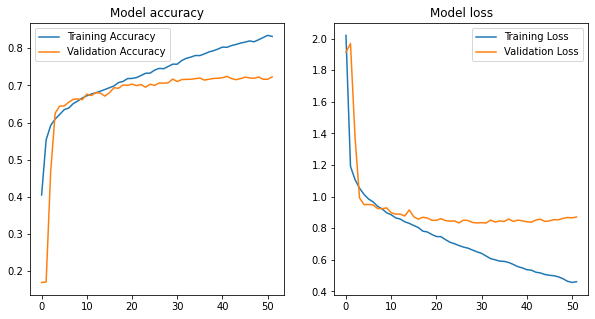

In [6]:
plot_model_history(history)